In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

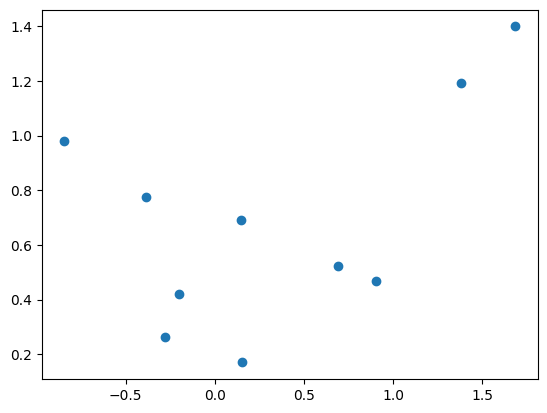

In [84]:
# Simulating a problem (2 degree polynomial).
np.random.seed(seed=3123)
N = 10

X = norm.rvs(size=N, scale=1, loc=0)
mu = 0.3 + -0.2 * X + 0.5 * pow(X, 2)
y = norm.rvs(size=N, scale=0.2, loc=mu)

plt.scatter(X, y)

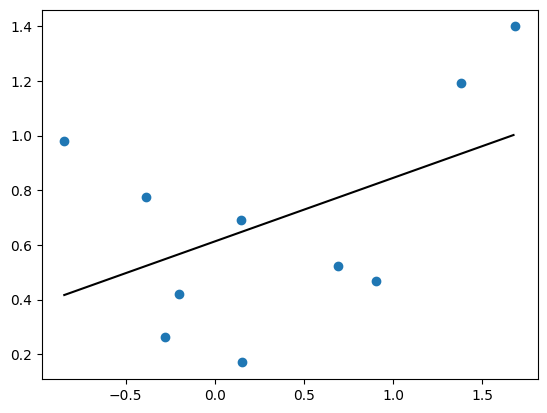

In [94]:
# Test over-fitting yourself, by changing the degree of the linear regression.
degree = 1

Xs = np.column_stack([pow(X, d + 1) for d in range(0, degree)])

model = LinearRegression().fit(Xs, y)

# Plot this stuff.
plotX = np.arange(min(X), max(X), 0.02)
plotXs = np.column_stack([pow(plotX, d + 1) for d in range(0, degree)])

plotY = model.intercept_ + np.matmul(plotXs,model.coef_)

plt.scatter(X, y)  # Plot the data.
plt.plot(plotX, plotY, color="black")  # Plot our line.

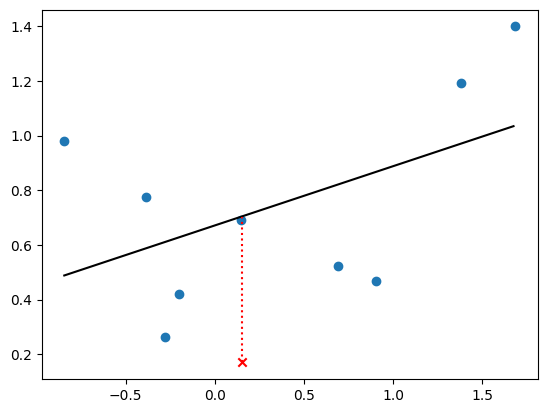

In [105]:
# How does the fit look like if we remove one element while fitting.
# We may eventually use it to rate our fit "out of the sample".
degree = 1

Xs = np.column_stack([pow(X, d + 1) for d in range(0, degree)])

# Split test and train set.
test = np.random.choice(np.arange(0, N), size=1, replace=False)
train = [e for e in np.arange(0, N) if e not in test]

model = LinearRegression().fit(Xs[train], y[train])

# Plot this stuff.
plotX = np.arange(min(X), max(X), 0.02)
plotXs = np.column_stack([pow(plotX, d + 1) for d in range(0, degree)])
plotY = model.intercept_ + np.matmul(plotXs, model.coef_)

plt.scatter(X[train], y[train])  # Plot the data.
plt.scatter(X[test], y[test], marker="x", color="red")  # Plot the data.
plt.plot(plotX, plotY, color="black")  # Plot our line.

ypred = model.intercept_ + np.matmul(Xs,model.coef_)

plt.plot([X[test][0],X[test][0]], [y[test][0], ypred[test][0]], color="red", linestyle = ":")

In [112]:
# How does the fit look like if we remove one element while fitting.
# We may eventually use it to rate our fit "out of the sample".
degree = 2
Xs = np.column_stack([pow(X, d + 1) for d in range(0, degree)])
square_errors = []

for i in np.arange(0, N):
    # Extreme form of cross-validation (just leaving out every observation).
    test = [i]
    train = [e for e in np.arange(0, N) if e not in test]

    model = LinearRegression().fit(Xs[train], y[train])

    ypred = model.intercept_ + np.matmul(Xs,model.coef_)

    square_error = np.power(y[test] - ypred[test], 2) # Square error.
    square_errors = np.concatenate([square_errors, square_error])

# Explore both:
#square_errors
np.mean(square_errors)

0.04803899032943219

Text(0, 0.5, 'error')

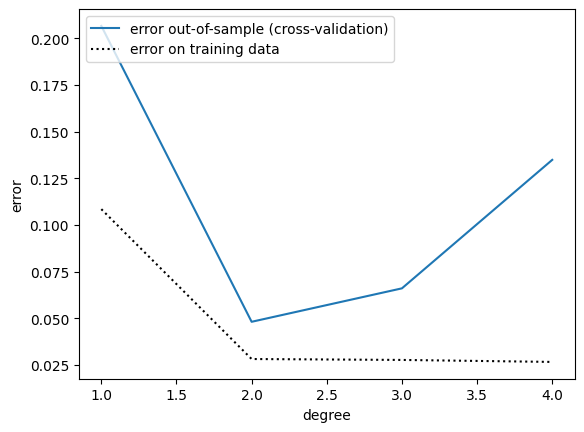

In [113]:
degree_error = []
degree_error_train = []
degrees = range(1,5)
for degree in degrees:

    Xs = np.column_stack([pow(X, d + 1) for d in range(0, degree)])

    square_errors = []

    square_errors_in_trains = []

    for i in np.arange(0, N):
        # Extreme form of cross-validation (just leaving out every observation).
        test = [i]
        train = [e for e in np.arange(0, N) if e not in test]

        model = LinearRegression().fit(Xs[train], y[train])

        ypred = model.intercept_ + np.matmul(Xs,model.coef_)

        square_error = np.power(y[test] - ypred[test], 2) # Square error.
        square_errors = np.concatenate([square_errors, square_error])

        square_errors_in_trains = np.concatenate([square_errors_in_trains, np.power(y[train] - ypred[train], 2)])

    # Explore both:
    degree_error.append(np.mean(square_errors))
    degree_error_train.append(np.mean(square_errors_in_trains))

plt.plot(degrees,degree_error, label= "error out-of-sample (cross-validation)")
plt.plot(degrees,degree_error_train, color= "black", linestyle = ":", label= "error on training data")

plt.legend(loc="upper left")

plt.xlabel("degree")
plt.ylabel("error")